# Sample calibration workflow

Creates a tree of data objects nested under a parent datacube while running a sample processing workflow (calibration) then saves the full tree into an HDF5 file.

In [1]:
import py4DSTEM
from py4DSTEM.visualize import show
import numpy as np

In [2]:
# Set filepaths

#  - experimental aluminum dataset
#  - a same day/conditions vacuum scan
#  - a path to write to
filepath_calibration_dm = "/media/AuxDriveB/Data/HadasSternlicht/conductive_polymers/500C/dataset_123_aluminumStandard/dataset_123.dm4"
filepath_vacuum = "/media/AuxDriveB/Data/HadasSternlicht/conductive_polymers/500C/dataset_141_vacuumScan/dataset_141.dm4"
filepath_h5 = "/home/ben/Desktop/test.h5"

In [3]:
# Load a datacube from a dm file

datacube = py4DSTEM.io.read(filepath_calibration_dm)
datacube = py4DSTEM.io.datastructure.DataCube(
    data=datacube.data[0:15,0:20,:,:])

print(datacube)
print('')
print('tree:')
datacube.tree.print()

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

tree:
/
|--calibration




In [5]:
## examine the calibrations

In [6]:
datacube.tree['calibration']

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    [1, 1]
             R_pixel_size:    [1, 1]
             Q_pixel_units:   ['pixels', 'pixels']
             R_pixel_units:   ['pixels', 'pixels']
)

In [7]:
datacube.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    [1, 1]
             R_pixel_size:    [1, 1]
             Q_pixel_units:   ['pixels', 'pixels']
             R_pixel_units:   ['pixels', 'pixels']
)

In [8]:
datacube.calibration is datacube.tree['calibration']

True

In [9]:
datacube.Q_pixel_size = 0.2
datacube.Q_pixel_units = 'A^-1'

datacube.R_pixel_size = 5
datacube.R_pixel_units = 'nm'

In [10]:
datacube.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    [0.2, 0.2]
             R_pixel_size:    [5, 5]
             Q_pixel_units:   ['A^-1', 'A^-1']
             R_pixel_units:   ['nm', 'nm']
)

In [11]:
datacube

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)

In [12]:
# Virtual diffraction

dp_max = py4DSTEM.process.virtualimage.get_dp_max(datacube)
dp_mean = py4DSTEM.process.virtualimage.get_dp_mean(datacube)
dp_median = py4DSTEM.process.virtualimage.get_dp_median(datacube)

In [ ]:
# Add this -

#datacube.get_dp_max(return_result=True)

# make above methods not add to tree

In [14]:
print('')
print("tree:")
datacube.tree.print()


tree:
/
|--calibration
|--dp_max
|--dp_mean
|--dp_median




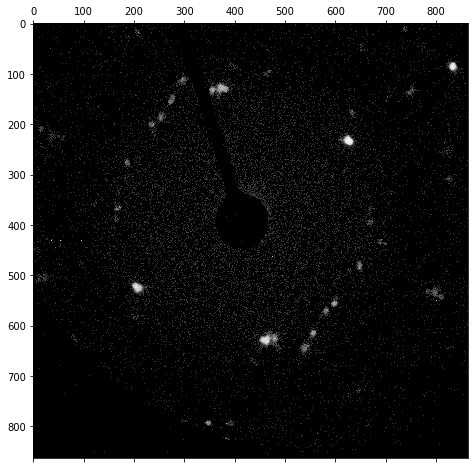

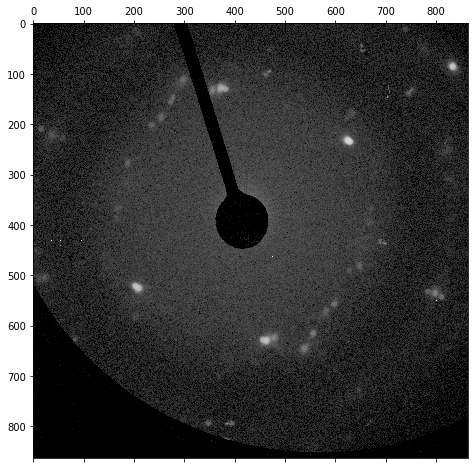

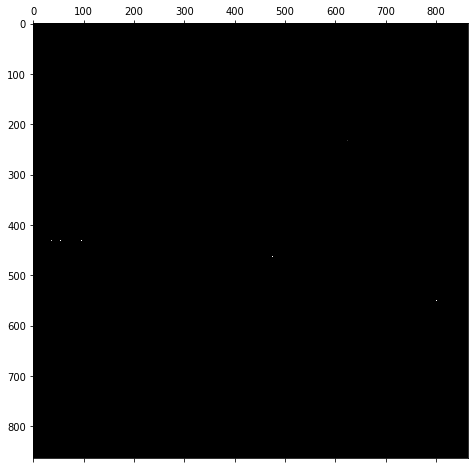

In [15]:
show(datacube.tree['dp_max'],scaling='log')
show(datacube.tree['dp_mean'],scaling='log')
show(datacube.tree['dp_median'],scaling='log')

In [16]:
assert( datacube.tree['dp_max'] is dp_max )
assert( datacube.tree['dp_mean'] is dp_mean )
assert( datacube.tree['dp_median'] is dp_median )

100%|█████████████████████████████████████████████| 300/300 [00:00<00:00, 2493.64it/s]


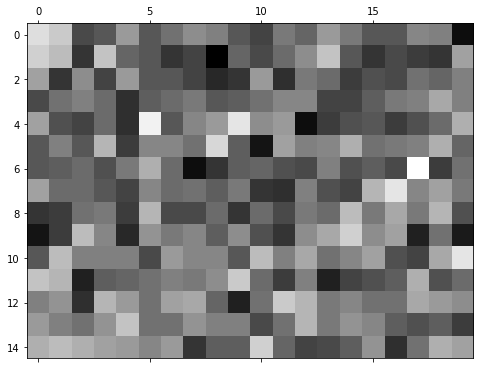

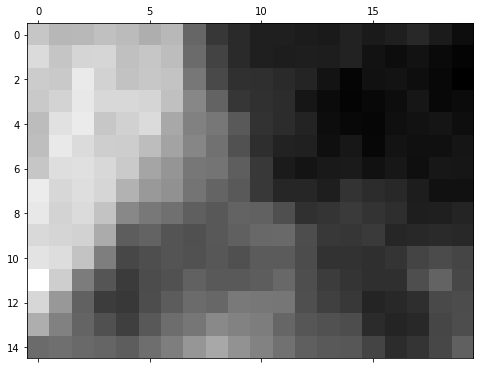


tree:
/
|--calibration
|--dp_max
|--dp_mean
|--dp_median
|--vBF
|--vADF
|--virtual_image




In [37]:
# Virtual imaging

geometry_BF = (
    (432,432),
    30
)
geometry_ADF = (
    (432,432),
    (80,300)
)


im_BF = py4DSTEM.process.virtualimage.get_virtualimage(
    datacube,
    geometry_BF,
    name = 'vBF'
)
im_ADF = py4DSTEM.process.virtualimage.get_virtualimage(
    datacube,
    geometry_ADF,
    name = 'vADF'
)
show(datacube.tree['vBF'])
show(datacube.tree['vADF'])

print('')
print("tree:")
datacube.tree.print()

In [18]:
## Probe

In [19]:
# load a vacuum scan

datacube_vacuum = py4DSTEM.io.read(
    filepath_vacuum,
    name = 'datacube_vacuum'
)
print('Loaded a vacuum datacube:')
print(datacube_vacuum)

Loaded a vacuum datacube:
DataCube( A 4-dimensional array of shape (172, 180, 864, 864) called 'datacube_vacuum',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)


In [33]:
# Make a vacuum probe

probe = py4DSTEM.process.probe.get_vacuum_probe(
    datacube_vacuum,
    ROI = (6,10,6,10),
    name = 'vacuum_probe')

print("Generated a probe:")
print(probe)

100%|█████████████████████████████████████████████████| 15/15 [00:02<00:00,  6.34it/s]


Generated a probe:
Probe( A stack of 2 Arrays with 2-dimensions and shape (864, 864), called 'vacuum_probe'

       The labels are:
           probe
           kernel


       The Array dimensions are:
           Qx = [0,1,...] pixels
           Qy = [0,1,...] pixels
)


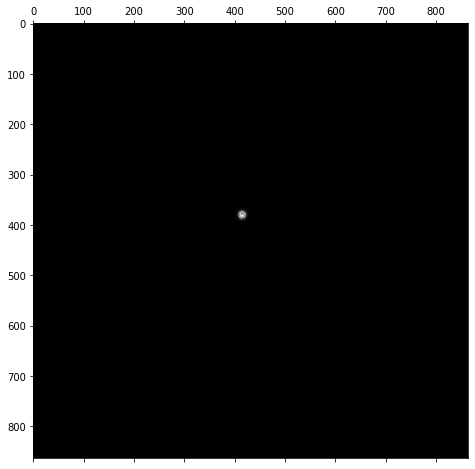

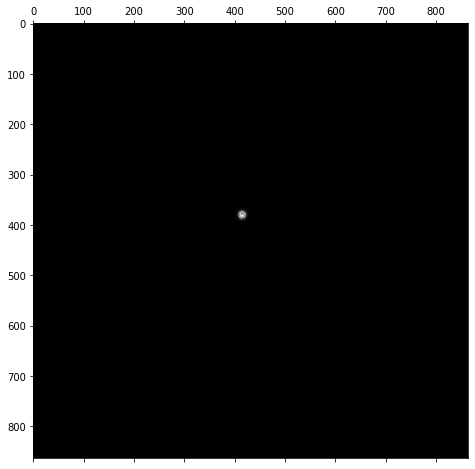

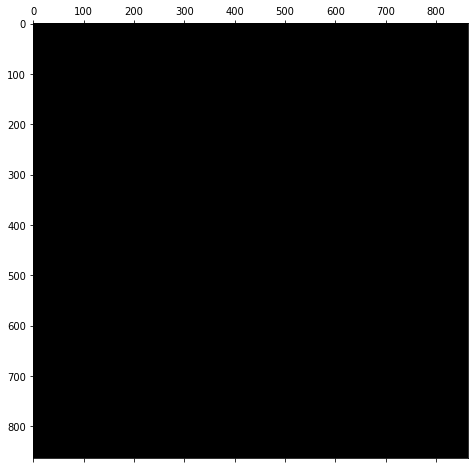

In [34]:
show(probe.probe)
show(probe.get_slice('probe').data)
show(probe.kernel)

In [35]:
datacube.tree.print()

/
|--calibration
|--dp_max
|--dp_mean
|--dp_median
|--vBF
|--vADF




In [36]:
datacube_vacuum.tree.print()

/
|--calibration
|--probe
|--vacuum_probe




In [ ]:
#datacube.add_probe(probe)

In [85]:
datacube.tree['probe'] = probe

In [86]:
datacube.tree.print()

/
|--calibration
|--dp_max
|--dp_mean
|--dp_median
|--vBF
|--vADF
|--virtual_image
|--probe




# I/O

## save a single object

In [38]:
filepath_h5

'/home/ben/Desktop/test.h5'

In [39]:
datacube

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)

In [41]:
# save a file with just the datacube

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    tree = False,
    mode = 'o'
)

In [42]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
	|--datacube
		|--calibration




In [43]:
# load a single object from the file tree

loaded_datacube = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube/',
)
# add data_id alias
# add warning
# add data_id flags/quick-indexing

print(loaded_datacube)
print(loaded_datacube.tree)

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
)


In [44]:
loaded_datacube.tree.print()

/
|--calibration




## save the whole tree

In [45]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    tree = True,
    mode = 'o'
)

In [46]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
	|--datacube
		|--calibration
		|--dp_max
		|--dp_mean
		|--dp_median
		|--vADF
		|--vBF
		|--virtual_image




In [47]:
# load a single object from the file tree

loaded_dpmax_notree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube/dp_max',
    tree = False
)

print(loaded_dpmax_notree)
print(loaded_dpmax_notree.tree)

Array( A 2-dimensional array of shape (864, 864) called 'dp_max',
       with dimensions:

       dim0 = [0,1,...] pixels
       dim1 = [0,1,...] pixels
)
Tree( An object tree containing the following top-level object instances:

)


In [48]:
# load the datacube without it's tree

loaded_datacube_notree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube',
    tree = False
)

print(loaded_datacube_notree)
print(loaded_datacube_notree.tree)
print(loaded_datacube_notree.tree['calibration'])

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
)
Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    1D-array
             R_pixel_size:    1D-array
             Q_pixel_units:   1D-array
             R_pixel_units:   1D-array
)


In [49]:
# load the datacube with it's tree

loaded_datacube_tree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube',
    tree = True
)

print(loaded_datacube_tree)
print(loaded_datacube_tree.tree)

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
          dp_max 		 (Array)
          dp_mean 		 (Array)
          dp_median 		 (Array)
          vADF 		 (Array)
          vBF 		 (Array)
          virtual_image 		 (Array)
)


In [50]:
loaded_datacube_tree.tree.print()

/
|--calibration
|--dp_max
|--dp_mean
|--dp_median
|--vADF
|--vBF
|--virtual_image




In [51]:
# load the whole file from root

loaded_tree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/',
    tree = True
)

print(loaded_tree)
print(loaded_tree.tree)

Root( A Root instance called '4DSTEM_experiment', containing the following top-level object instances:

          datacube 		 (DataCube)
)
Tree( An object tree containing the following top-level object instances:

          datacube 		 (DataCube)
)


In [53]:
loaded_tree.tree.print()

/
|--datacube
	|--calibration
	|--dp_max
	|--dp_mean
	|--dp_median
	|--vADF
	|--vBF
	|--virtual_image




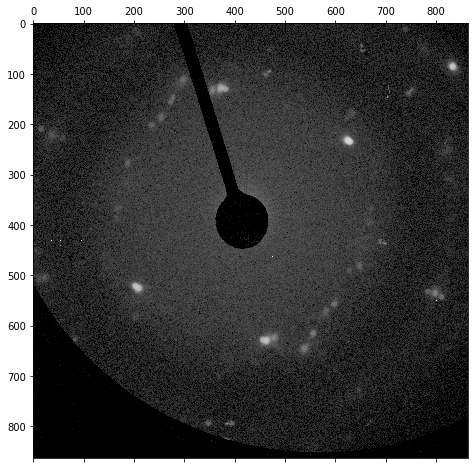

In [54]:
show(loaded_tree['datacube/dp_mean'].data, scaling='log')

In [55]:
# load the tree underneath the DataCube, without loading the Datacube

loaded_noroot_tree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube',
    tree = 'noroot'
)

print(loaded_noroot_tree)
print(loaded_noroot_tree.tree)

Root( A Root instance called 'root', containing the following top-level object instances:

          calibration 		 (Calibration)
          dp_max 		 (Array)
          dp_mean 		 (Array)
          dp_median 		 (Array)
          vADF 		 (Array)
          vBF 		 (Array)
          virtual_image 		 (Array)
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
          dp_max 		 (Array)
          dp_mean 		 (Array)
          dp_median 		 (Array)
          vADF 		 (Array)
          vBF 		 (Array)
          virtual_image 		 (Array)
)


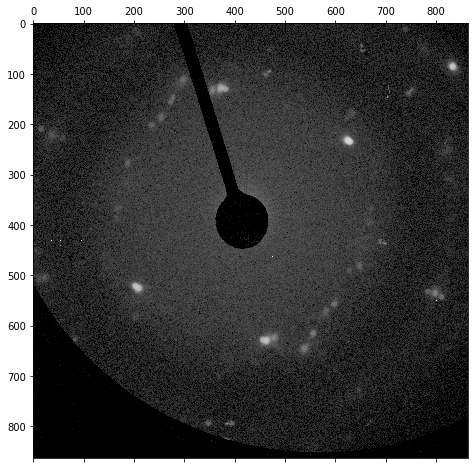

In [56]:
show(loaded_noroot_tree['dp_mean'].data, scaling='log')

## save the tree underneath the DataCube, without the DataCube itself

In [57]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    tree = 'noroot',
    mode = 'o'
)

In [58]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
	|--datacube
		|--calibration
		|--dp_max
		|--dp_mean
		|--dp_median
		|--vADF
		|--vBF
		|--virtual_image




In [60]:
# load a single object from the file tree

loaded_dpmax_notree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube/dp_max',
    tree = False
)

print(loaded_dpmax_notree)
print(loaded_dpmax_notree.tree)

Array( A 2-dimensional array of shape (864, 864) called 'dp_max',
       with dimensions:

       dim0 = [0,1,...] pixels
       dim1 = [0,1,...] pixels
)
Tree( An object tree containing the following top-level object instances:

)


In [61]:
# load the datacube without it's tree

loaded_datacube_notree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube',
    tree = False
)

print(loaded_datacube_notree)
print(loaded_datacube_notree.tree)
print(loaded_datacube_notree.tree['calibration'])

Root( A Root instance called 'datacube', containing the following top-level object instances:

          calibration 		 (Calibration)
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
)
Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    1D-array
             R_pixel_size:    1D-array
             Q_pixel_units:   1D-array
             R_pixel_units:   1D-array
)


In [62]:
# load the datacube with it's tree

loaded_datacube_tree = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment/datacube',
    tree = True
)

print(loaded_datacube_tree)
print(loaded_datacube_tree.tree)

Root( A Root instance called 'datacube', containing the following top-level object instances:

          calibration 		 (Calibration)
          dp_max 		 (Array)
          dp_mean 		 (Array)
          dp_median 		 (Array)
          vADF 		 (Array)
          vBF 		 (Array)
          virtual_image 		 (Array)
)
Tree( An object tree containing the following top-level object instances:

          calibration 		 (Calibration)
          dp_max 		 (Array)
          dp_mean 		 (Array)
          dp_median 		 (Array)
          vADF 		 (Array)
          vBF 		 (Array)
          virtual_image 		 (Array)
)


In [63]:
loaded_datacube_tree.tree.print()

/
|--calibration
|--dp_max
|--dp_mean
|--dp_median
|--vADF
|--vBF
|--virtual_image




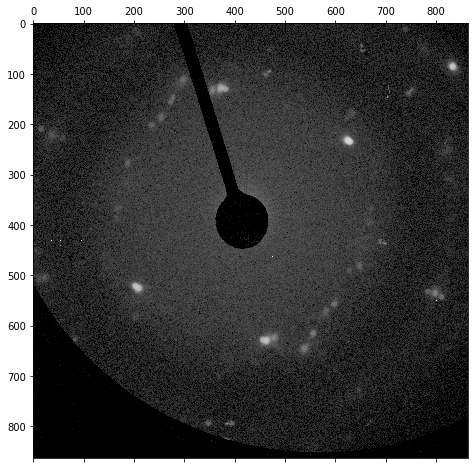

In [64]:
show(loaded_datacube_tree['dp_mean'].data, scaling='log')

## append to an existing file

In [70]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
	|--datacube
		|--calibration
		|--dp_max
		|	|--datacube
		|		|--calibration
		|		|--dp_max
		|		|--dp_mean
		|		|--dp_median
		|		|--vADF
		|		|--vBF
		|		|--virtual_image
		|--dp_mean
		|--dp_median
		|--vADF
		|--vBF
		|--virtual_image




In [67]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    tree = True,
    mode = 'a'
)

In [71]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    root = '4DSTEM_experiment/datacube/dp_max',
    tree = True,
    mode = 'a'
)

In [72]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
	|--datacube
		|--calibration
		|--dp_max
		|	|--datacube
		|		|--calibration
		|		|--dp_max
		|		|--dp_mean
		|		|--dp_median
		|		|--vADF
		|		|--vBF
		|		|--virtual_image
		|--dp_mean
		|--dp_median
		|--vADF
		|--vBF
		|--virtual_image




In [73]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    root = '4DSTEM_experiment/datacube/dp_max',
    tree = True,
    mode = 'a'
)

Exception: Data with this name already exists in this location. Either change the data's name, or overwrite using appendover mode.

In [79]:
# save a file

py4DSTEM.io.save(
    filepath_h5,
    datacube,
    root = '4DSTEM_experiment3/datacube/dp_max',
    tree = True,
    mode = 'a'
)

In [80]:
# print the file contents

py4DSTEM.io.print_h5_tree(
    filepath_h5
)

/
|--4DSTEM_experiment
|	|--datacube
|		|--calibration
|		|--dp_max
|		|	|--datacube
|		|		|--calibration
|		|		|--dp_max
|		|		|--dp_mean
|		|		|--dp_median
|		|		|--vADF
|		|		|--vBF
|		|		|--virtual_image
|		|--dp_mean
|		|--dp_median
|		|--vADF
|		|--vBF
|		|--virtual_image
|--4DSTEM_experiment2
|	|--datacube
|		|--calibration
|		|--dp_max
|		|--dp_mean
|		|--dp_median
|		|--vADF
|		|--vBF
|		|--virtual_image
|--4DSTEM_experiment3
	|--datacube
		|--dp_max
			|--datacube
				|--calibration
				|--dp_max
				|--dp_mean
				|--dp_median
				|--vADF
				|--vBF
				|--virtual_image




In [77]:
data = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment'
)

In [78]:
data.tree.print()

/
|--datacube
	|--calibration
	|--dp_max
	|	|--datacube
	|		|--calibration
	|		|--dp_max
	|		|--dp_mean
	|		|--dp_median
	|		|--vADF
	|		|--vBF
	|		|--virtual_image
	|--dp_mean
	|--dp_median
	|--vADF
	|--vBF
	|--virtual_image




In [83]:
data = py4DSTEM.io.read(
    filepath_h5,
    root = '4DSTEM_experiment3/datacube/dp_max/datacube',
    tree = False
)

In [84]:
data

DataCube( A 4-dimensional array of shape (15, 20, 864, 864) called 'datacube',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.2,...] A^-1
          Qy = [0.0,0.2,...] A^-1
)

In [ ]:
# add data types and shapes to tree

